# Problem 2-3

<img src="Exercicio 2-3-1.png">
<img src="Exercicio 2-3-2.png">
<img src="Exercicio 2-3-3.png">
<img src="Exercicio 2-3-4.png">
<img src="Exercicio 2-3-5.png">

In [138]:
# Lib Initialization 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math as m


# Initial Conditions & Half Step

In [286]:


def potential(x):
    return 0.5 * x**2


def initialconditions(V, R0, deltax, deltat, L, timeframe):
    x = np.arange(-L, L + deltax, deltax)  
    t = np.arange(0, timeframe + deltat, deltat)
    n_x = x.size
    n_t = t.size
    R = np.zeros((n_x, n_t),dtype=np.longdouble)
    I = np.zeros((n_x, n_t),dtype = np.longdouble)
    for i in range(n_x-1):
        R[i, 0] = R0(x[i])
    # Apply zero boundary conditions at t=0
    R[0, 0] = 0.0      # At x = -L
    R[-1, 0] = 0.0     # At x = L
    I[:, 0] = 0.0      # Assuming I is zero at t=0
    # Compute I at t = deltat/2 using the initial R
    for i in range(1,n_x-1):
        HF =   -0.5 *((R[i+1, 0] - 2*R[i, 0] + R[i-1, 0])/(deltax**2) ) + V(x[i]) * R[i, 0] 
        I[i, 1] = I[i-1,1] + (deltat / 2) * HF
    # Apply zero boundary conditions at t = deltat/2
    I[0, 1] = 0.0
    I[-1, 1] = 0.0
    return R, I, x, t 

def finddeltat(V,deltax,L):
    #in this specific potential(the harmonic trap) as V always increases for modulus(x), its biggest value is given by V(L)
    #As the harmonic trap is always positive, the lower bound is 0 
    upperbounddt = 1/((V(L)/2) + (1/deltax**2))
    deltat = upperbounddt
    return deltat

def visscheralgorithm(V, R0, deltax, L, timeframe):
    #Obtain a deltat that ensures stability.
    deltat = finddeltat(V,deltax,L)
    R, I, x, t = initialconditions(V, R0, deltax, deltat, L, timeframe)
    n_x, n_t = R.shape
    P = np.zeros((n_x, n_t))

    for j in range(2, n_t-1):
        for i in range(2, n_x - 1):
            HF_I = -0.5 * (I[i+1, j-1] - 2*I[i, j-1] + I[i-1, j-1]) / (deltax**2) + V(x[i]) * I[i, j-1]
            HF_R = -0.5 * (R[i+1, j-1] - 2*R[i, j-1] + R[i-1, j-1]) / (deltax**2) + V(x[i]) * R[i, j-1]
            # Update R and I at current time step
            R[i, j] = R[i, j - 1] + deltat * HF_I
            I[i, j] = I[i, j - 1] - deltat * HF_R
            # Calculate probability density 
            P[i,j] = (R[i,j]**2)+ I[i,j-1]*I[i,j]
        # Apply zero boundary conditions at x = -L and x = L
        R[0, j] = 0.0
        R[-1, j] = 0.0
        I[0, j] = 0.0
        I[-1, j] = 0.0

    return P, x, t,deltat



## a) Consider the initial state:

$\psi(x,0) = (\frac{1}{4})^{1/4} e^{-x^2 /2}$

What happens? Why?

In [287]:
# In this case

def initialstatea(x):
    return ((1/m.pi)**(1/4))*m.exp(-(x**2)/2)

#V,R0,deltax,L, timeframe

P,x,t,deltat = visscheralgorithm(potential,initialstatea,0.3,15,3)
print(deltat)


0.014845360824742268


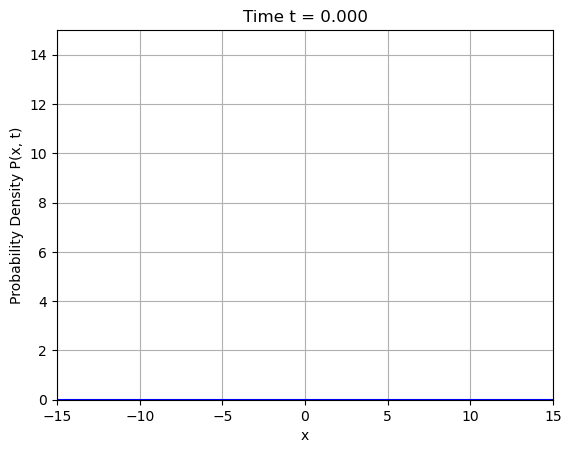

In [284]:
fig, ax = plt.subplots()

skipsize = 10  # Set your desired skip size here

def animate(i):
    ax.clear()
    # i is the actual frame index after skipping
    ax.plot(x, P[:, i], color='blue')
    # Set plot limits
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(0, 15)
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density P(x, t)')
    ax.set_title(f'Time t = {t[i]:.3f}')
    ax.grid(True)

# Create a list of frame indices, selecting every 'skipsize' frame
frame_indices = range(0, len(t), skipsize)

# Adjust the interval to maintain the total animation duration
original_interval = 50  # Original interval in milliseconds
adjusted_interval = original_interval * skipsize

# Create the animation object
anim = FuncAnimation(
    fig,
    animate,
    frames=frame_indices,   # Use the list of skipped frames
    interval=adjusted_interval,  # Adjust interval accordingly
    repeat=False
)

# Save the animation as a GIF
anim.save('probability_density_evolution_a.gif', writer='pillow', fps=20)

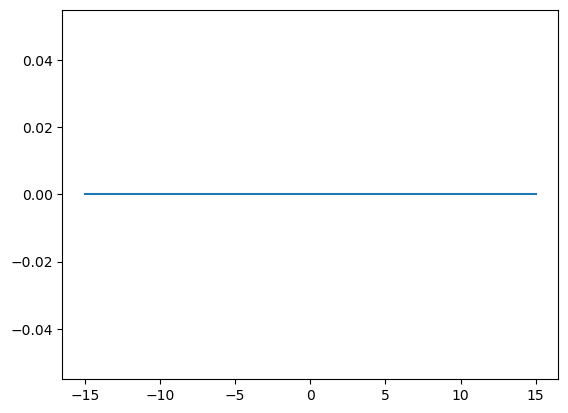

In [288]:
plt.plot(x,P[:,0])
plt.show()

## b)

In [48]:
def initialstateb(x):
    return ((2/np.pi)**(1/4))*np.exp(-(x**2))

P,x,t = visscheralgorithm(potential,initialstatea,0.5,20,5)

ValueError: too many values to unpack (expected 3)

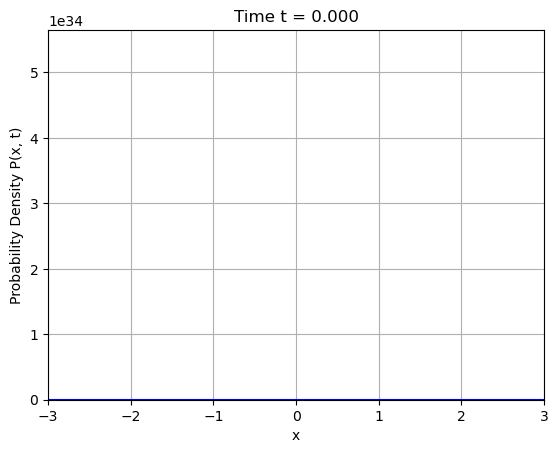

In [226]:
fig, ax = plt.subplots()

skipsize = 20  # Set your desired skip size here

def animate(i):
    ax.clear()
    # i is the actual frame index after skipping
    ax.plot(x, P[:,i], color='blue')
    # Set plot limits
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(0, P.max() * 1.1)
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density P(x, t)')
    ax.set_title(f'Time t = {t[i]:.3f}')
    ax.grid(True)

# Create a list of frame indices, selecting every 'skipsize' frame
frame_indices = range(0, len(t), skipsize)

# Adjust the interval to maintain the total animation duration
original_interval = 50  # Original interval in milliseconds
adjusted_interval = original_interval * skipsize

# Create the animation object
anim = FuncAnimation(
    fig,
    animate,
    frames=frame_indices,   # Use the list of skipped frames
    interval=adjusted_interval,  # Adjust interval accordingly
    repeat=False
)

# Save the animation as a GIF
anim.save('probability_density_evolution_b.gif', writer='pillow', fps=20)
